### Medium is a place to read articles on the Internet. Medium is a blogging platform, like Wordpress or Blogger. Medium is the new project from the guys who brought you Twitter.

> “**Medium is not about who you are or whom you know, but about what you have to say.”– Erik Devaney**
> 

### Almost everyone will agree that Medium is a great place to share your story. As a writer, I have found that it’s simple, clean, and easy to use. Almost anyone can produce a great looking story within minutes.


### This Notebook might be useful for somebody who is willing to start their Medium journey or have already been a part and want to explore more !! 


In [9]:
# importing the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for data visualisation
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt 
import seaborn as sns

pio.templates.default = "plotly_dark"
sns.set_style('darkgrid')
%matplotlib inline
import os
for dirname, _, filenames in os.walk('../input/medium-articles-dataset/medium_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
## reading the data

data =pd.read_csv('medium_data.csv')
data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


## Preprocessing Data

In [11]:
#removing an invalid input from response 
## from the 'responses'column we found data named 'READ' which is wrong since its a Numeric column
data = data.drop(data[data['responses']=='Read'].index)

In [12]:

data['date'] = pd.to_datetime(data['date']) ## to relevant datatype

data['responses'] = data['responses'].astype(int) # converting to relevant datatype

## Let us start with some Interesting Visualisations to understand our Data better!

In [33]:
claps = data.groupby('publication')['claps'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(claps, x= 'publication', y='claps', color = 'publication',
       title="Claps for various Publishers" )

<Figure size 720x576 with 0 Axes>

In [14]:
reps=data.groupby('publication')['response'].sum().sort_values(ascending=False).reset_index()

<Figure size 720x576 with 0 Axes>

In [15]:
## Visualisation for Reading Time

read = data.groupby('publication')['reading_time'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(read, x= 'publication', y='reading_time', color = 'publication',
       title="Reading Time for various Publishers" )

<Figure size 720x576 with 0 Axes>

In [16]:
data['month'] = data['date'].dt.month
date_gr = data.groupby('month')['publication'].count().sort_values(ascending = False).reset_index()
plt.figure(figsize = (10,8))
px.bar(date_gr, x= 'month', y='publication', color = 'publication',hover_data=['publication'],
       title="Month wise Publication" )

<Figure size 720x576 with 0 Axes>

### We see that the **highest publications submitted is in the month of MAY**
### And the **least publications submitted in the month of January.**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Publications With Number Of Articles')

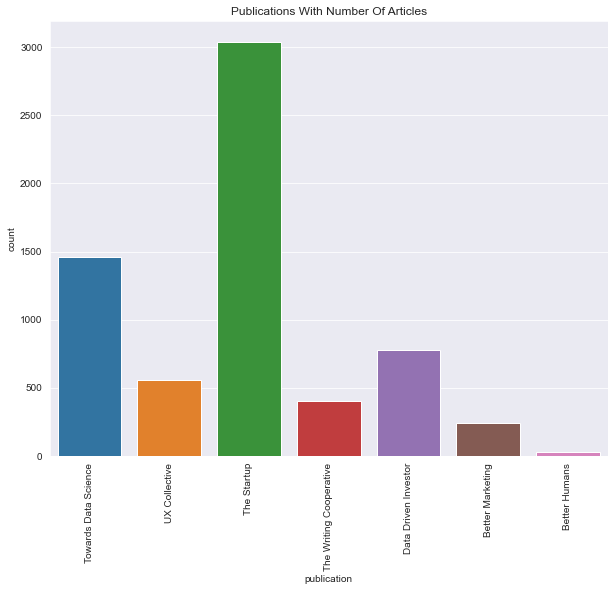

In [17]:
plt.figure(figsize = (10,8))
sns.countplot(data['publication'])
plt.xticks(rotation = 90)
plt.title('Publications With Number Of Articles')

In [18]:
dis = ['claps','responses','reading_time']
dist = pd.DataFrame(data[dis])

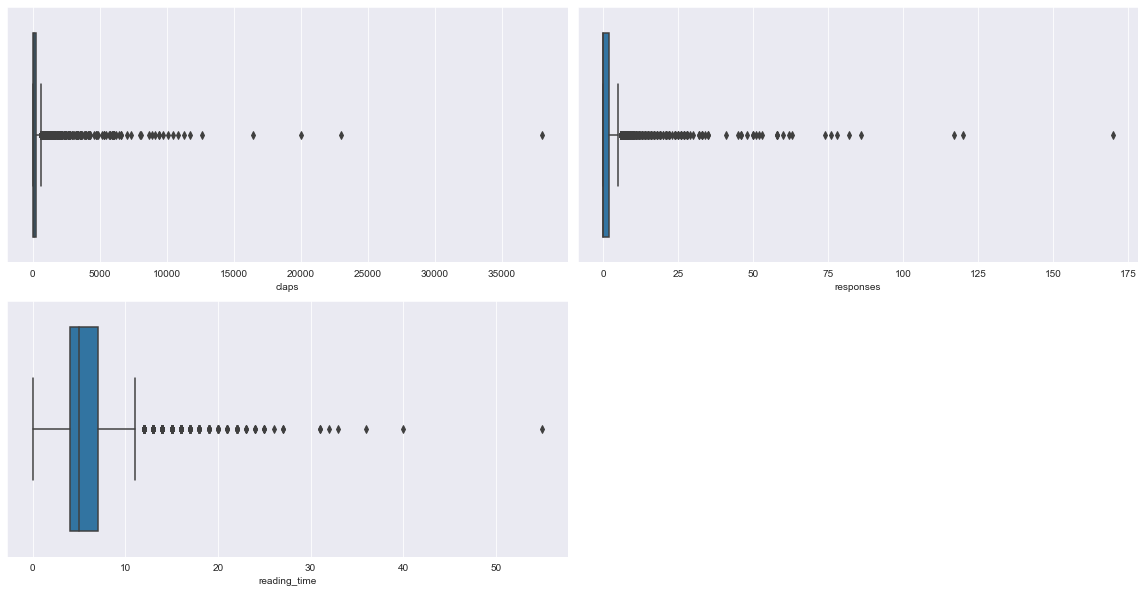

In [19]:
fig = plt.figure(figsize = (16,12))
for index,col in enumerate(dist):
    plt.subplot(3,2,index+1)
    sns.boxplot(x = dist.loc[:,col])
fig.tight_layout(pad=1.0)

## Conclusions:

### 1. The number of claps for many articles is around 0, so you need not worry much, if you are not getting the required claps.

### 2. The number of Responses is very limited too, people hardly comment on Medium articles.

### 3. The average reading time of the articles is around 5-6 mins, make sure to keep your articles short and crisp, usually people like to jump to the part where they find the most valuable information.

In [20]:
all_publication = data.groupby('publication')['reading_time'].sum().sort_values(ascending = False)
fig = px.pie(all_publication,values = all_publication.values, names=all_publication.index,
            title='Publication with Highest Reading Time')
fig.show()

## Publication with the highest Reading time - 'The Startup'

### Readers usually devote their time to The Startup and Towards Data Science

In [21]:
pub_clap = data.groupby('title')['claps'].max().sort_values(ascending= False).head(10).reset_index()
px.bar(pub_clap, x= 'title', y='claps', 
       title="Articles with Highest Claps" )

## Article with the Highest Claps with the values

In [22]:
pub_resp = data.groupby('title')['responses'].max().sort_values(ascending= False).head(10).reset_index()
px.bar(pub_resp, x= 'title', y='responses',title="Articles with Highest responses" )

## This Notebook might come in handy for those who are starting in the field of Content Writing!

### Be smart and choose your publication!

### Do upvote and give your thoughts on this :-)